# Visualizing `nomisma` data in Jupyter notebooks

Python has fantastic libraries for working with spatial data.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily
import matplotlib.pyplot as plt

## Load locations for mints

In [2]:
URL = "https://raw.githubusercontent.com/neelsmith/nomisma/master/tables/mintpoints.csv"
FILE_HEADER = ['mint','lon','lat']
USE_COLS = ['mint','lon','lat']
df = pd.read_csv(
    URL, delimiter=",",
    names=FILE_HEADER, 
    usecols=USE_COLS,
    header=1
    )

In [3]:
from shapely.geometry import Point
mints = geopandas.GeoDataFrame(
    df.drop(['lon', 'lat'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(df.lon, df.lat)]
)
mints2 = mints.to_crs(epsg=3857)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Visualize with `contextily`

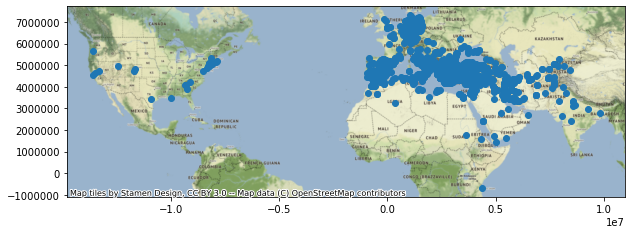

In [4]:
bx = mints2.plot(figsize=(10, 6))
contextily.add_basemap(bx)

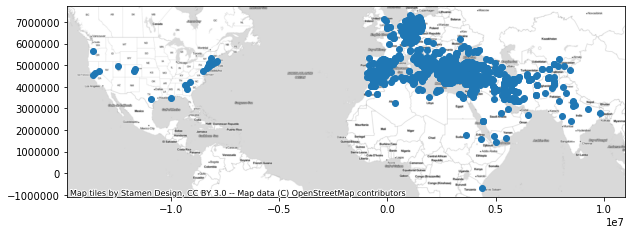

In [5]:
bx = mints2.plot(figsize=(10, 6))
contextily.add_basemap(bx, url=contextily.providers.Stamen.TonerLite)